In [1]:
import os
import scanpy as sc
from scipy import sparse
import numpy as np
import pandas as pd
import scipy.io as sio 

In [2]:
%%time
counts = np.genfromtxt('D:/MyData/scEDGE_Generation/data/GSE74672/counts.csv', delimiter=',', dtype=float).T
obs = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE74672/cell_info.csv',header=0)
var = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE74672/gene_name.csv',header=0)

CPU times: total: 26.1 s
Wall time: 26.1 s


In [3]:
print(type(counts), type(obs), type(var))

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [4]:
adata = sc.AnnData(X=counts,
                  obs=obs,
                  var=var)

C:\Users\23247\AppData\Local\Temp\ipykernel_10508\3412430690.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=counts,
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
adata.X = sparse.csr_matrix(adata.X)

In [6]:
adata.obs.set_index('cellID',inplace=True)

In [7]:
adata.var.set_index('gene_name',inplace=True)

In [8]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [9]:
adata = adata[adata.obs.total_counts < 75000, :]

In [10]:
adata

View of AnnData object with n_obs × n_vars = 2881 × 24341
    obs: 'level1 class', 'level2 class (neurons only)', 'level2 cluster number (neurons only)', 'age (days postnatal)', 'sex (female=1,male=-1)', 'cell diameter', 'acute stress (true=1)', 'total molecules', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [11]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

D:\Anaconda3\envs\PyTorch\lib\site-packages\scanpy\preprocessing\_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [12]:
adata

AnnData object with n_obs × n_vars = 2881 × 18553
    obs: 'level1 class', 'level2 class (neurons only)', 'level2 cluster number (neurons only)', 'age (days postnatal)', 'sex (female=1,male=-1)', 'cell diameter', 'acute stress (true=1)', 'total molecules', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

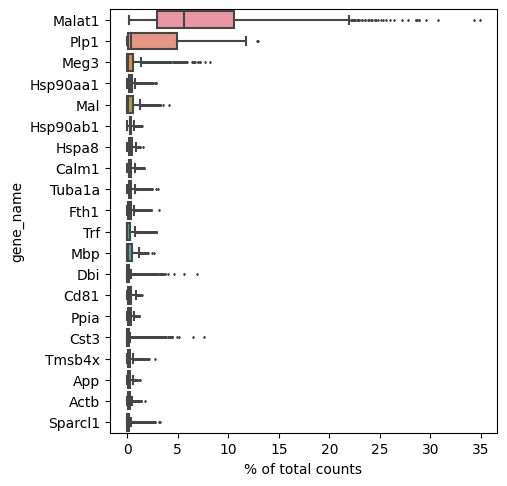

In [13]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [14]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [15]:
adata.obs

,level1 class,level2 class (neurons only),level2 cluster number (neurons only),age (days postnatal),"sex (female=1,male=-1)",cell diameter,acute stress (true=1),total molecules,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt
cellID,,,,,,,,,,,,,
1772058147_F02,oligos,NaN,NaN,NaN,0,10.20,0,2844,1097,2842.0,1098,0.0,0.0
1772096158_E08,oligos,NaN,NaN,21.0,-1,10.10,0,3483,1454,3483.0,1454,0.0,0.0
1772096144_A05,oligos,NaN,NaN,27.0,-1,9.26,1,7107,3496,7107.0,3496,0.0,0.0
1772092004_A05,oligos,NaN,NaN,29.0,-1,11.50,1,6149,1852,6149.0,1852,0.0,0.0
1772092004_B06,oligos,NaN,NaN,29.0,-1,7.85,1,5216,1732,5216.0,1732,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772092005_H03,neurons,uc,NaN,29.0,-1,11.50,1,11981,3171,11981.0,3171,0.0,0.0
1772096133_F06,neurons,uc,NaN,25.0,-1,12.50,1,14193,4795,14186.0,4800,0.0,0.0
1772096144_F04,neurons,uc,NaN,27.0,-1,11.00,1,3660,2139,3660.0,2139,0.0,0.0


In [16]:
adata.obs['label']=adata.obs['level1 class']

In [17]:
adata.obs

,level1 class,level2 class (neurons only),level2 cluster number (neurons only),age (days postnatal),"sex (female=1,male=-1)",cell diameter,acute stress (true=1),total molecules,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt,label
cellID,,,,,,,,,,,,,,
1772058147_F02,oligos,NaN,NaN,NaN,0,10.20,0,2844,1097,2842.0,1098,0.0,0.0,oligos
1772096158_E08,oligos,NaN,NaN,21.0,-1,10.10,0,3483,1454,3483.0,1454,0.0,0.0,oligos
1772096144_A05,oligos,NaN,NaN,27.0,-1,9.26,1,7107,3496,7107.0,3496,0.0,0.0,oligos
1772092004_A05,oligos,NaN,NaN,29.0,-1,11.50,1,6149,1852,6149.0,1852,0.0,0.0,oligos
1772092004_B06,oligos,NaN,NaN,29.0,-1,7.85,1,5216,1732,5216.0,1732,0.0,0.0,oligos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772092005_H03,neurons,uc,NaN,29.0,-1,11.50,1,11981,3171,11981.0,3171,0.0,0.0,neurons
1772096133_F06,neurons,uc,NaN,25.0,-1,12.50,1,14193,4795,14186.0,4800,0.0,0.0,neurons
1772096144_F04,neurons,uc,NaN,27.0,-1,11.00,1,3660,2139,3660.0,2139,0.0,0.0,neurons


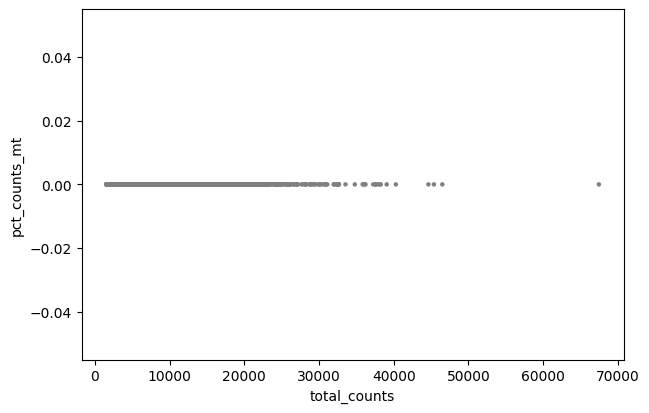

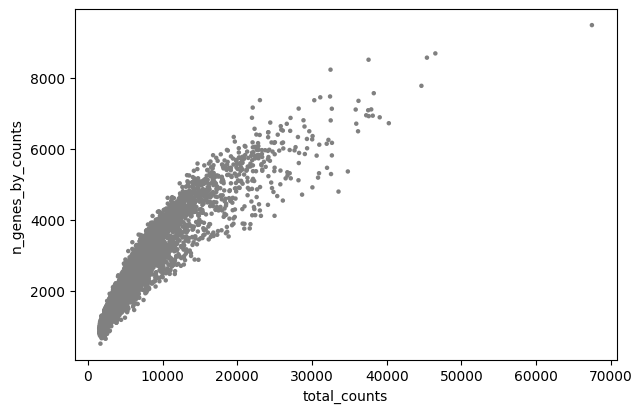

In [18]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [19]:
adata.raw = adata

In [20]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Romanov/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Romanov/processed')

adata.write('D:/MyData/scEDGE_Generation/data/Romanov/processed/Romanov.h5ad')

In [21]:
expression_matrix = adata.X.T  
obs_data = adata.obs  
var_data = adata.var  

In [22]:
obs_data.to_csv('D:/MyData/scEDGE_Generation/data/Romanov/processed/romanov_obs_data.csv')  
var_data.to_csv('D:/MyData/scEDGE_Generation/data/Romanov/processed/romanov_var_data.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Romanov/processed/romanov_expression_matrix.mtx', expression_matrix)

## Top2000

In [23]:
sc.pp.highly_variable_genes(
                    adata,
                    n_top_genes=min(2000, adata.shape[1]),
                    subset=True,
                    # layer="counts",
                    flavor="seurat_v3")

D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [24]:
adata_top = adata[:, adata.var.highly_variable]

In [25]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Romanov_top2000/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Romanov_top2000/processed')

adata_top.write('D:/MyData/scEDGE_Generation/data/Romanov_top2000/processed/Romanov_top2000.h5ad')

In [26]:
expression_matrix_top = adata_top.X.T  
obs_data_top = adata_top.obs  
var_data_top = adata_top.var  

In [27]:
obs_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Romanov_top2000/processed/Romanov_obs_data_top2000.csv')  
var_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Romanov_top2000/processed/Romanov_var_data_top2000.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Romanov_top2000/processed/Romanov_expression_matrix_top2000.mtx', expression_matrix_top)